# TP1

## Dimitris Proios



## Requirements install 

In [11]:
import matplotlib.pyplot as plt
import numpy as np



## Exercise 1 -- Noise and Metrics

### 1.a) Write a function that determines the Mean Squared Error (MSE) between two images x and y.

In MSE, the lower the error, the more "similar" the two images are
The two images must have the same dimension.

- MSE definition 

$ MSE = \frac{1}{N M} \sum{ _{i=1} ^{N}  \sum{ _{i=1} ^{M} (x[i,j] - y[i,j]) ^2}}$ 



In [1]:

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	

	return err


Load 2 images to test functionality

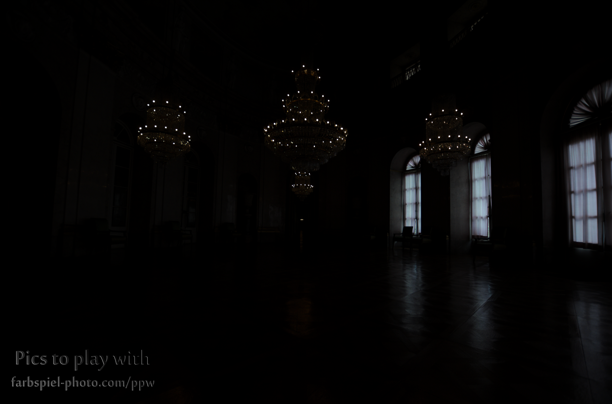

In [22]:
from PIL import Image
imA = Image.open('./data/hdr_images/img01.tif')
imA

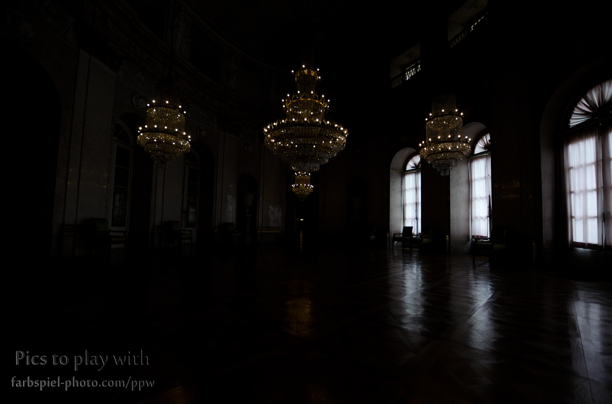

In [23]:
imB = Image.open('./data/hdr_images/img02.tif')
imB

In [24]:
mse(np.array(imA), np.array(imB))

1056.0645869734033

In [25]:
imgCam = Image.open('./data/cameraman.tif')
mse(np.array(imgCam), np.array(imgCam))


0.0

## 1.b)  Read in a new copy of the image cameraman.tif, keep it in its original datatype and range, i.e. uint8 and {0..255}.

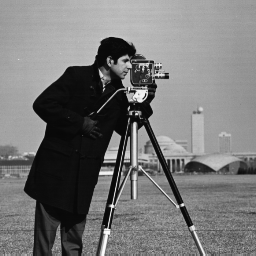

In [26]:
imgCam = Image.open('./data/cameraman.tif')
imgCam

In [46]:
imgCam_unint8 = np.array(imgCam).astype("uint8")
imgCam_unint8


array([[156, 159, 158, ..., 151, 152, 152],
       [160, 154, 157, ..., 154, 155, 153],
       [156, 159, 158, ..., 151, 152, 152],
       ...,
       [114, 132, 123, ..., 135, 137, 114],
       [121, 126, 130, ..., 133, 130, 113],
       [121, 126, 130, ..., 133, 130, 113]], dtype=uint8)

## 1.c)  Now read in a second copy of the image cameraman.tif but map it to double and {0..1}. See Matlab im2double. Compare the two images using the MSE. Can you explain the result?

### Answer 
The mse is 17842.766630867263
which I believe is correct since the mse is not immune to different range.
### Notes 
- For numpy reference of types I used this documentation https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html
- For the replaccement of im2doublle function I used https://docs.scipy.org/doc/numpy/reference/generated/numpy.interp.html 



In [45]:
imgCam_double = np.array(imgCam).astype("float64")
imgCam_double = np.interp(
    imgCam_double, 
    (imgCam_double.min(), imgCam_double.max()), 
    (0, 1)
)
imgCam_double 

array([[0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       [0.62195122, 0.59756098, 0.6097561 , ..., 0.59756098, 0.60162602,
        0.59349593],
       [0.60569106, 0.61788618, 0.61382114, ..., 0.58536585, 0.58943089,
        0.58943089],
       ...,
       [0.43495935, 0.50813008, 0.47154472, ..., 0.5203252 , 0.52845528,
        0.43495935],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431],
       [0.46341463, 0.48373984, 0.5       , ..., 0.51219512, 0.5       ,
        0.43089431]])

In [44]:
mse(imgCam_double, imgCam_unint8 )


17842.766630867263

## Exercise 2 
### 2.a) Refractor the PNSR definition such that the PSNR is expressed as a function of the noise variance $σ_z ^2 $. You may assume that $σ_z ^2  = MSE(x, y)$ 

- PSNR original definition 
<br> 

(1) $ PSNR = 10 \log_{10} \frac{a^2}{MSE(x,y)} $ 

<br>

(2) $MSE(x,y) = \sigma _{z} ^2 $

<br>

(1) (2) $ PSNR = 10 \log_{10} \frac{a^2}{\sigma _{z} ^2} $ 
<br>



<br> 

 $ PSNR = 20 \log_{10} a - 10\log_{10}{\sigma _{z} ^2}  $ 

<br> 

 $ PSNR - 20 \log_{10} a  = 10\log_{10}{\sigma _{z} ^2}  $ 

<br> 

 $ \frac{PSNR - 20 \log_{10} a }{10} = \log_{10}{\sigma _{z} ^2}  $ 

<br> 

 (3) $ 10^ {\frac{PSNR - 20 \log_{10} a }{10}} = \sigma _{z} ^2  $ 

This relationship above is used in 2.b.



### 2.b) Add Gaussian noise to an image such that the PSNR ratio with the original image is 10dB, 20dB, 30dB and 40dB. Use randn, not imnoise.



In [47]:
import math 
PSNRs = [10, 20, 30, 40]
getVarianceForPSNR = lambda db: 10**((db-20 * math.log(255, 10))/10)
varianceList = [(db, getVarianceForPSNR(db)) for db in PSNRs ]
varianceList


[(10, 0.00015378700499807824),
 (20, 0.0015378700499807825),
 (30, 0.015378700499807824),
 (40, 0.1537870049980782)]

- Noise function:
$Z_i= N(\mu, \sigma ^2 )$


In [68]:
def gaussianNoise(image, var = 1000, mean = 0,):
      row,col = image.shape
      sigma = var**0.5
      randomGaus = np.random.normal(mean,sigma,(row,col))
      gaussNoiseMatrix = randomGaus.reshape(row,col)
      noisy = image + gaussNoiseMatrix
      return noisy, gaussNoiseMatrix

from PIL import Image
imgCam = Image.open('./data/cameraman.tif')
imgCam_double_array = np.array(imgCam).astype(np.float32)
img = Image.fromarray(imgCam_double_array, 'F')
img.save('ex2b_doubleCame.tiff')
# img.show()

def experiment(db, variance):
    print(db, var)
    noisedImgArray, gaussNoiseMatrix = gaussianNoise(imgCam_double)
    noisedImg = Image.fromarray(noisedImgArray)
    filename = str(db) + "__ex2b_noised_doubleCame.tiff"
    noisedImg.save(filename)
    noisedImg.show()
    return (noisedImg, noisedImgArray)
    
noised_images = [experiment(db,var) for db,var in iter(varianceList)]
    


10 0.1537870049980782
20 0.1537870049980782
30 0.1537870049980782
40 0.1537870049980782


### 2.c) Show the noisy images on the screen. How do they look?

They look bad the more db we have 

### 2.d) Show the histograms for these noisy images, can you explain what you see?


In [72]:
import IPython.display 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('10.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

[ np.histogram(im[1],256,[0,256]) for im in noised_images]




[(array([161, 181, 178, 175, 188, 174, 184, 187, 168, 194, 184, 212, 184,
         208, 193, 186, 189, 201, 183, 188, 185, 206, 196, 193, 193, 182,
         210, 189, 187, 191, 190, 178, 181, 176, 182, 171, 187, 169, 181,
         170, 153, 182, 153, 172, 173, 157, 145, 170, 178, 147, 156, 153,
         140, 134, 141, 158, 135, 145, 149, 126, 131, 146, 127, 137, 162,
         135, 145, 148, 141, 149, 155, 130, 131, 143, 141, 129, 154, 156,
         153, 165, 178, 164, 171, 162, 161, 163, 158, 172, 175, 200, 180,
         194, 198, 194, 184, 187, 195, 219, 191, 226, 226, 179, 239, 234,
         263, 213, 258, 253, 246, 253, 289, 260, 298, 292, 298, 326, 309,
         314, 314, 343, 351, 323, 344, 312, 376, 406, 366, 390, 411, 404,
         421, 412, 401, 367, 407, 393, 416, 382, 430, 450, 419, 430, 455,
         439, 448, 472, 494, 454, 476, 497, 472, 498, 458, 518, 463, 460,
         484, 476, 476, 457, 494, 484, 480, 473, 448, 430, 428, 471, 417,
         413, 441, 428, 474, 454, 422,